# Importin necessary library

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
%matplotlib inline

# Reading all necessary data

In [2]:
customer_acqusition = pd.read_csv('Customer Acqusition.csv')
spend_df = pd.read_csv('spend.csv')
repayment_df = pd.read_csv('Repayment.csv')
c_c_df = pd.read_excel('Credit Card Data.xlsx')

# Data exploration

In [3]:
customer_acqusition.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment'],
      dtype='object')

In [4]:
customer_acqusition.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002,C5,Normal Salary


In [5]:
customer_acqusition = customer_acqusition.drop("No",axis=1)

In [6]:
customer_acqusition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Customer  100 non-null    object
 1   Age       100 non-null    int64 
 2   City      100 non-null    object
 3   Product   100 non-null    object
 4   Limit     100 non-null    int64 
 5   Company   100 non-null    object
 6   Segment   100 non-null    object
dtypes: int64(2), object(5)
memory usage: 5.6+ KB


In [7]:
customer_acqusition.describe()

,Age,Limit
count,100.000000,100.000000
mean,46.490000,284700.610000
std,18.282572,218494.967852
min,12.000000,10000.000000
25%,33.750000,100000.000000
50%,46.500000,300001.500000
75%,60.250000,500000.000000
max,79.000000,500000.000000


In [8]:
customer_acqusition.isna().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [9]:
customer_acqusition.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [10]:
customer_acqusition.shape

(100, 7)

In [11]:
repayment_df.columns

Index(['SL No:', 'Customer', 'Month', 'Amount'], dtype='object')

In [12]:
repayment_df.rename(columns={"Amount":"Repay_Amount"},inplace=True)

In [13]:
repayment_df.head()

,SL No:,Customer,Month,Repay_Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,03-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88


In [14]:
repayment_df.drop(columns="SL No:",inplace=True)

In [15]:
repayment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer      1500 non-null   object 
 1   Month         1500 non-null   object 
 2   Repay_Amount  1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 35.3+ KB


In [16]:
repayment_df.describe()

,Repay_Amount
count,1500.000000
mean,247890.054420
std,145290.382733
min,55.860000
25%,118604.905000
50%,248008.185000
75%,367236.890000
max,499930.660000


In [17]:
repayment_df["Month"] = pd.to_datetime(repayment_df.Month, format="%d-%b-%y")

In [18]:
repayment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Customer      1500 non-null   object        
 1   Month         1500 non-null   datetime64[ns]
 2   Repay_Amount  1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 35.3+ KB


In [19]:
repayment_df.head()

,Customer,Month,Repay_Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


In [20]:
repayment_df.isna().sum()

Customer        0
Month           0
Repay_Amount    0
dtype: int64

In [21]:
repayment_df.isnull().sum()

Customer        0
Month           0
Repay_Amount    0
dtype: int64

In [22]:
repayment_df.shape

(1500, 3)

In [23]:
spend_df.columns

Index(['Sl No:', 'Customer', 'Month', 'Type', 'Amount'], dtype='object')

In [24]:
spend_df.rename(columns={"Amount":"Spent_Amount"},inplace=True)

In [25]:
spend_df = spend_df.drop("Sl No:",axis=1)

In [26]:
spend_df.head()

,Customer,Month,Type,Spent_Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,03-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [27]:
spend_df["Month"] = pd.to_datetime(spend_df.Month,format="%d-%b-%y")

In [28]:
spend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Customer      1500 non-null   object        
 1   Month         1500 non-null   datetime64[ns]
 2   Type          1500 non-null   object        
 3   Spent_Amount  1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 47.0+ KB


In [29]:
spend_df.describe()

,Spent_Amount
count,1500.000000
mean,243096.049460
std,141349.547367
min,720.300000
25%,122606.487500
50%,239210.360000
75%,361617.632500
max,499793.490000


In [30]:
spend_df.isna().sum()

Customer        0
Month           0
Type            0
Spent_Amount    0
dtype: int64

In [31]:
spend_df.isnull().sum()

Customer        0
Month           0
Type            0
Spent_Amount    0
dtype: int64

In [32]:
spend_df.shape

(1500, 4)

In [33]:
c_c_df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment'],
      dtype='object')

In [34]:
c_c_df.drop(columns="No",inplace=True)

In [35]:
c_c_df.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001,C4,Govt
4,A5,56,BANGALORE,Platimum,10002,C5,Normal Salary


In [36]:
c_c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Customer  100 non-null    object
 1   Age       100 non-null    int64 
 2   City      100 non-null    object
 3   Product   100 non-null    object
 4   Limit     100 non-null    int64 
 5   Company   100 non-null    object
 6   Segment   100 non-null    object
dtypes: int64(2), object(5)
memory usage: 5.6+ KB


In [37]:
c_c_df.describe()

,Age,Limit
count,100.000000,100.000000
mean,46.490000,284700.610000
std,18.282572,218494.967852
min,12.000000,10000.000000
25%,33.750000,100000.000000
50%,46.500000,300001.500000
75%,60.250000,500000.000000
max,79.000000,500000.000000


In [38]:
c_c_df.isna().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [39]:
c_c_df.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [40]:
c_c_df.shape

(100, 7)

# Solutions

## 1. In the above dataset,
    a. In case age is less than 18, replace it with mean of age values.
    b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
    (customer’s limit provided in acquisition table is the per transaction limit on his card)
    c. Incase the repayment amount is more than the limit, replace the repayment with the
    limit.

### a. In case age is less than 18, replace it with mean of age values

In [41]:
customer_acqusition[customer_acqusition.Age<18]

,Customer,Age,City,Product,Limit,Company,Segment
13,A14,16,BANGALORE,Gold,500000,C14,Salaried_Pvt
40,A41,13,COCHIN,Platimum,500000,C23,Govt
62,A63,15,BANGALORE,Gold,500000,C25,Self Employed
67,A68,12,TRIVANDRUM,Silver,100000,C30,Self Employed
69,A70,16,BOMBAY,Platimum,10001,C32,Self Employed
89,A90,16,COCHIN,Gold,500000,C13,Govt


In [42]:
(customer_acqusition.Age<18).sum()

6

In [43]:
m_age = round((customer_acqusition.Age).mean())
m_age

46

In [44]:
customer_acqusition["Age"] = np.where(customer_acqusition.Age<18,m_age,customer_acqusition.Age)

In [45]:
(customer_acqusition.Age<18).sum()

0

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit

In [46]:
customer_acqusition.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001,C4,Govt
4,A5,56,BANGALORE,Platimum,10002,C5,Normal Salary


In [47]:
spend_df.head()

,Customer,Month,Type,Spent_Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07


In [48]:
c_s_df = pd.merge(left=customer_acqusition,right=spend_df,on="Customer")
c_s_df.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Spent_Amount
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [49]:
c_s_df[c_s_df.Spent_Amount>c_s_df.Limit].head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Spent_Amount
18,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC,2004-01-03,RENTAL,199554.72
19,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC,2005-02-28,TRAIN TICKET,376887.49
20,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC,2004-04-06,BUS TICKET,439648.53
21,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC,2004-11-23,PETRO,384078.73
22,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC,2005-09-03,JEWELLERY,117089.16


In [50]:
(c_s_df.Spent_Amount>c_s_df.Limit).sum()

607

In [51]:
c_s_df["Spent_Amount"] = np.where(c_s_df.Spent_Amount>c_s_df.Limit,c_s_df.Limit*0.5,c_s_df.Spent_Amount)

c_s_df[c_s_df.Customer=='A2'].head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Spent_Amount
18,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC,2004-01-03,RENTAL,50000.0
19,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC,2005-02-28,TRAIN TICKET,50000.0
20,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC,2004-04-06,BUS TICKET,50000.0
21,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC,2004-11-23,PETRO,50000.0
22,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC,2005-09-03,JEWELLERY,50000.0


In [52]:
(c_s_df.Spent_Amount>c_s_df.Limit).sum()

0

### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [53]:
customer_acqusition.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001,C4,Govt
4,A5,56,BANGALORE,Platimum,10002,C5,Normal Salary


In [54]:
repayment_df.head()

,Customer,Month,Repay_Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


In [55]:
c_r_df = pd.merge(left=customer_acqusition,right=repayment_df,on="Customer")
c_r_df.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repay_Amount
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,165972.88


In [56]:
c_r_df[c_r_df.Repay_Amount>c_r_df.Limit].head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repay_Amount
18,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC,2004-01-03,185955.07
19,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC,2005-02-28,412783.34
20,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC,2004-04-06,148038.67
21,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC,2004-11-23,179144.68
23,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC,2005-08-03,381635.66


In [57]:
(c_r_df.Repay_Amount>c_r_df.Limit).sum()

600

In [58]:
c_r_df["Repay_Amount"] = np.where(c_r_df.Repay_Amount>c_r_df.Limit,c_r_df.Limit,c_r_df.Repay_Amount)
c_r_df.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repay_Amount
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,165972.88


In [59]:
(c_r_df.Repay_Amount>c_r_df.Limit).sum()

0

## 2. From the above dataset create the following summaries:
    a. How many distinct customers exist?
    b. How many distinct categories exist?
    c. What is the average monthly spend by customers?
    d. What is the average monthly repayment by customers?
    e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
    (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment Monthly spend. Interest is    earned only on positive profits and not on negative amounts)
    f. What are the top 5 product types?
    g. Which city is having maximum spend?
    h. Which age group is spending more money?
    i. Who are the top 10 customers in terms of repayment?

### a. How many distinct customers exist?

In [60]:
print("Number of unique customers are: ",customer_acqusition.Customer.nunique())

Number of unique customers are:  100


### b. How many distinct categories exist?

In [61]:
print("Number of unique caterories are: ",customer_acqusition.Product.nunique())

Number of unique caterories are:  3


### c. What is the average monthly spend by customers?

#### Before replacing spent amount by 50% of limit

In [62]:
spend_df["month"] = spend_df.Month.dt.month

In [63]:
spend_df["Year"] = spend_df.Month.dt.year

In [64]:
spend_df.head()

,Customer,Month,Type,Spent_Amount,month,Year
0,A1,2004-01-12,JEWELLERY,485470.80,1,2004
1,A1,2004-01-03,PETRO,410556.13,1,2004
2,A1,2004-01-15,CLOTHES,23740.46,1,2004
3,A1,2004-01-25,FOOD,484342.47,1,2004
4,A1,2005-01-17,CAMERA,369694.07,1,2005


In [65]:
monthly_spending_before = pd.DataFrame(spend_df.groupby(["Year","month"])["Spent_Amount"].mean()).reset_index()

In [66]:
pd.DataFrame(monthly_spending_before.groupby("month")["Spent_Amount"].sum()).round(2)

,Spent_Amount
month,
1,826511.45
2,704875.81
3,479312.20
4,719922.33
5,699398.49
6,439940.50
7,516621.76
8,474434.35
9,658109.68


#### After replacing spent amount by 50% of limit

In [67]:
c_s_df["month"] = c_s_df.Month.dt.month

In [68]:
c_s_df["year"] = c_s_df.Month.dt.year

In [69]:
monthly_spending_after = pd.DataFrame(c_s_df.groupby(["year","month"])["Spent_Amount"].mean()).reset_index()

In [70]:
pd.DataFrame(monthly_spending_after.groupby("month")["Spent_Amount"].sum()).round(2)

,Spent_Amount
month,
1,472818.10
2,439811.69
3,265428.38
4,405796.60
5,451646.44
6,346697.97
7,309891.77
8,355571.35
9,423395.11


### d. What is the average monthly repayment by customers?

#### Before replacing repay amount with limit

In [71]:
repayment_df["month"] = repayment_df.Month.dt.month

In [72]:
repayment_df["year"] = repayment_df.Month.dt.year

In [73]:
monthly_repayment_before = pd.DataFrame(repayment_df.groupby(["year","month"])["Repay_Amount"].mean()).reset_index()

In [74]:
pd.DataFrame(monthly_repayment_before.groupby("month")["Repay_Amount"].sum())

,Repay_Amount
month,
1,777513.137101
2,780021.460992
3,493436.547480
4,747302.562222
5,746290.973600
6,462190.271667
7,497807.862410
8,488574.914122
9,694721.899583


#### Before replacing repay amount with limit

In [75]:
c_r_df["month"] = c_r_df.Month.dt.month

In [76]:
c_r_df["year"] = c_r_df.Month.dt.year

In [77]:
monthly_repayment_after = pd.DataFrame(c_r_df.groupby(["year","month"])["Repay_Amount"].mean()).reset_index()

In [78]:
pd.DataFrame(monthly_repayment_after.groupby("month")["Repay_Amount"].sum())

,Repay_Amount
month,
1,545654.290905
2,471167.464349
3,332629.898196
4,477325.431556
5,522702.565266
6,262481.445833
7,320097.709144
8,311537.602365
9,391510.553125


#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [79]:
c_s_df.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Spent_Amount,month,year
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,1,2004
1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,PETRO,410556.13,1,2004
2,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,CLOTHES,23740.46,1,2004
3,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,FOOD,484342.47,1,2004
4,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,CAMERA,369694.07,1,2005


In [80]:
c_r_df.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repay_Amount,month,year
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,1,2004
1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,245899.02,1,2004
2,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,259490.06,1,2004
3,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,437555.12,1,2004
4,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,165972.88,1,2005


In [81]:
customer_spent_repayment = pd.merge(left=c_s_df,right=c_r_df,how="inner",on=['Customer', 'Age', 'City', 'Product', 'Limit', 'Company', 'Segment', 'Month', 'month',
             'year'])
customer_spent_repayment.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Spent_Amount,month,year,Repay_Amount
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,1,2004,495414.75
1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,1,2004,350446.82
2,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,TRAIN TICKET,440563.22,1,2004,495414.75
3,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,TRAIN TICKET,440563.22,1,2004,350446.82
4,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,PETRO,410556.13,1,2004,245899.02


In [82]:
customer_spent_repayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Customer      863 non-null    object        
 1   Age           863 non-null    int64         
 2   City          863 non-null    object        
 3   Product       863 non-null    object        
 4   Limit         863 non-null    int64         
 5   Company       863 non-null    object        
 6   Segment       863 non-null    object        
 7   Month         863 non-null    datetime64[ns]
 8   Type          863 non-null    object        
 9   Spent_Amount  863 non-null    float64       
 10  month         863 non-null    int64         
 11  year          863 non-null    int64         
 12  Repay_Amount  863 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 94.4+ KB


In [83]:
customer_spent_repayment.insert(loc=13,column="total_profit",value=((customer_spent_repayment.Repay_Amount-customer_spent_repayment.Spent_Amount)*0.029))
customer_spent_repayment.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Spent_Amount,month,year,Repay_Amount,total_profit
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,1,2004,495414.75,288.37455
1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,1,2004,350446.82,-3915.69542
2,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,TRAIN TICKET,440563.22,1,2004,495414.75,1590.69437
3,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,TRAIN TICKET,440563.22,1,2004,350446.82,-2613.37560
4,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,PETRO,410556.13,1,2004,245899.02,-4775.05619


In [84]:
monthly_profit = pd.DataFrame(customer_spent_repayment.groupby(["year","month"])["total_profit"].sum()).reset_index()
monthly_profit.head()

,year,month,total_profit
0,2004,1,160075.85097
1,2004,2,-7346.50910
2,2004,3,2414.56407
3,2004,4,3251.08589
4,2004,5,19841.43779


In [85]:
monthly_profit = monthly_profit[monthly_profit.total_profit>0]
monthly_profit

,year,month,total_profit
0,2004,1,160075.85097
2,2004,3,2414.56407
3,2004,4,3251.08589
4,2004,5,19841.43779
6,2004,11,5515.07616
8,2005,2,62585.90891
9,2005,4,11906.63179
10,2005,5,74422.81455
12,2005,7,9416.76516
13,2005,8,325.15670


In [86]:
monthly_profit = pd.DataFrame(monthly_profit.groupby("month")["total_profit"].sum())
monthly_profit

,total_profit
month,
1,167178.88883
2,75988.59386
3,19371.44726
4,53037.44982
5,142149.65699
6,6513.58473
7,20484.56586
8,435.34800
9,15751.55996


### f. What are the top 5 product types?

In [87]:
pd.DataFrame(c_s_df.groupby("Type")["Spent_Amount"].sum()).reset_index().sort_values(by="Spent_Amount",ascending=False).head().reset_index(drop=True)

,Type,Spent_Amount
0,PETRO,28597384.98
1,CAMERA,27690738.44
2,FOOD,20519243.60
3,AIR TICKET,20155847.12
4,TRAIN TICKET,19995825.72


### g. Which city is having maximum spend?

In [88]:
pd.DataFrame(c_s_df.groupby("City")["Spent_Amount"].sum()).reset_index().sort_values(by="Spent_Amount",ascending=False).head(1).reset_index(drop=True)

,City,Spent_Amount
0,COCHIN,45963513.5


### h. Which age group is spending more money?

In [89]:
customer_spending_by_age = c_s_df.copy()
customer_spending_by_age.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Spent_Amount,month,year
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,1,2004
1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,PETRO,410556.13,1,2004
2,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,CLOTHES,23740.46,1,2004
3,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,FOOD,484342.47,1,2004
4,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,CAMERA,369694.07,1,2005


In [90]:
customer_spending_by_age["age_group"] = pd.cut(customer_spending_by_age.Age,bins=10,
                                               labels=['18.94-25-Teen', '26-31-youth', '32-37-Adult1', '38-43-Adult2',
                                                       '44-49-Adult3', '50-55-Adult4', '56-61-Adult5', '62-67-seniors1',
                                                       '68-73-seniors2', '74-79-seniors3'])

In [91]:
pd.DataFrame(customer_spending_by_age.groupby("age_group")["Spent_Amount"].sum()).reset_index().sort_values(by="Spent_Amount",ascending=False).head(1).reset_index(drop=True)

,age_group,Spent_Amount
0,44-49-Adult3,39907148.99


### i. Who are the top 10 customers in terms of repayment?

In [92]:
pd.DataFrame(c_r_df.groupby("Customer")["Repay_Amount"].sum()).reset_index().sort_values(by="Repay_Amount",ascending=False).head(10).reset_index(drop=True)

,Customer,Repay_Amount
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A43,8489871.46
4,A45,8448334.87
5,A12,8334760.16
6,A14,7943268.63
7,A44,7744730.12
8,A39,7622483.30
9,A42,7615460.86


## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [93]:
city_wise_spending = pd.DataFrame(c_s_df.groupby(["City","year","Product"])['Spent_Amount'].sum()).reset_index()
city_wise_spending.head()

,City,year,Product,Spent_Amount
0,BANGALORE,2004,Gold,9289878.54
1,BANGALORE,2004,Platimum,1112732.30
2,BANGALORE,2004,Silver,1291852.58
3,BANGALORE,2005,Gold,12892362.99
4,BANGALORE,2005,Platimum,912284.97


In [94]:
city_wise_spending = city_wise_spending.pivot(index=["City","year"],columns='Product',values="Spent_Amount")

In [95]:
city_wise_spending

Product                 Gold    Platimum      Silver
City       year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

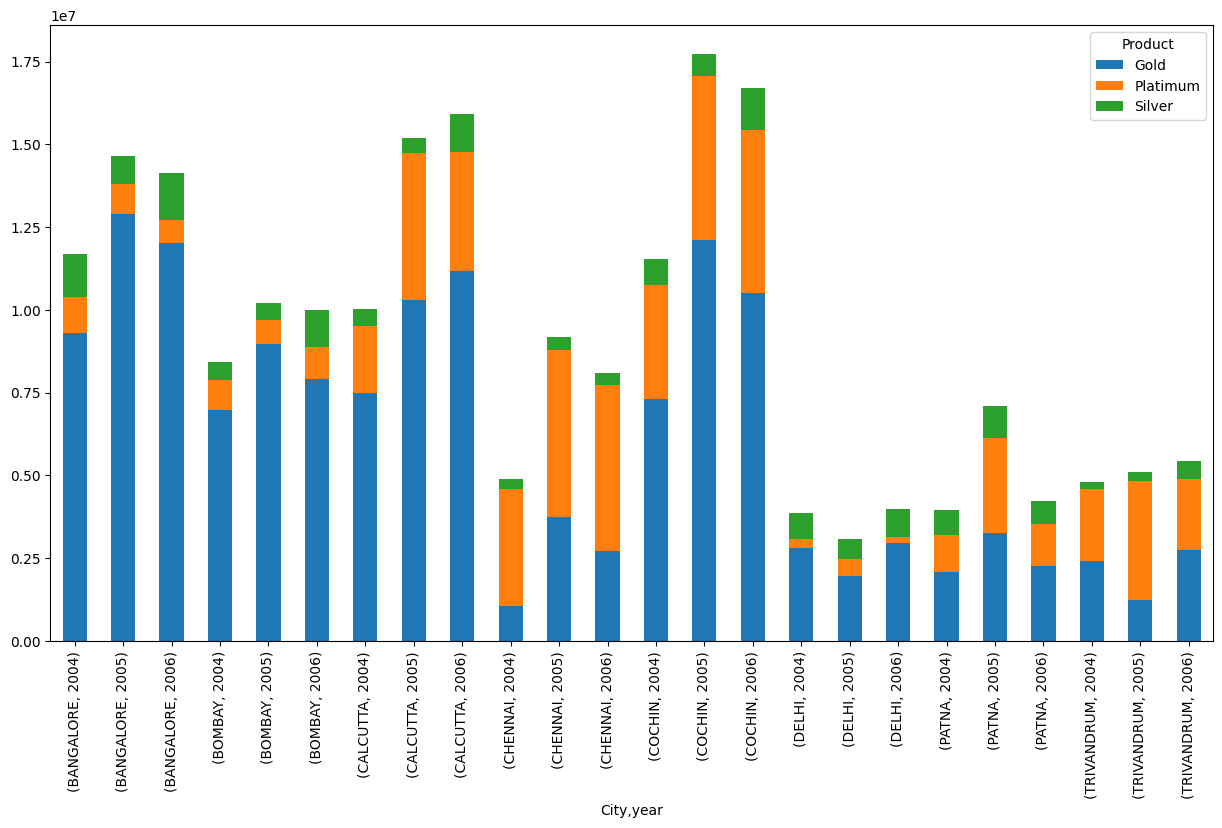

In [96]:
city_wise_spending.plot(kind="bar",stacked = True,figsize = (15,8))
plt.show()

## 4. Create graphs for
    a. Monthly comparison of total spends, city wise
    b. Comparison of yearly spend on air tickets
    c. Comparison of monthly spend for each product (look for any seasonality
    that exists in terms of spend)

### a. Monthly comparison of total spends, city wise

In [97]:
monthly_spending_by_city = pd.DataFrame(c_s_df.groupby(["City","month"])["Spent_Amount"].sum()).reset_index()

In [98]:
monthly_spending_by_city =monthly_spending_by_city.pivot(index="City",columns="month",values="Spent_Amount")

<AxesSubplot: xlabel='City'>

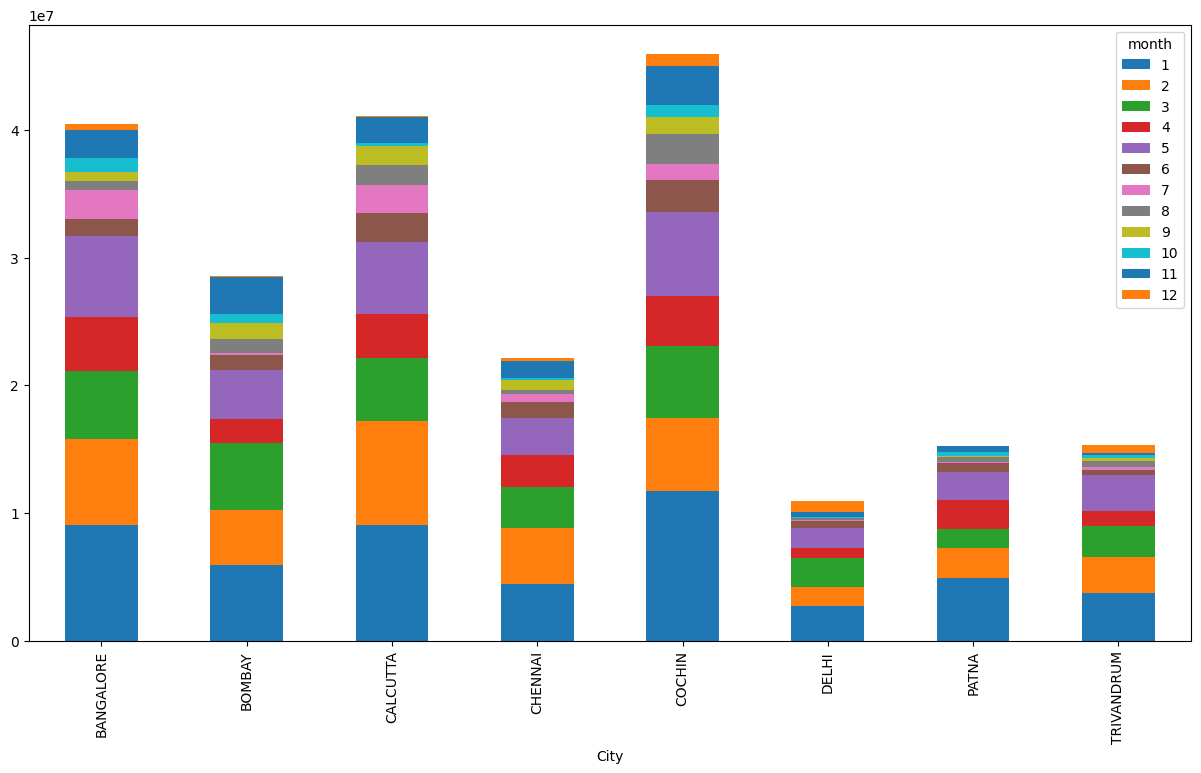

In [99]:
monthly_spending_by_city.plot(kind = "bar",stacked = True,figsize = (15,8))

### b. Comparison of yearly spend on air tickets

In [100]:
air_ticket_df = c_s_df[c_s_df.Type=="AIR TICKET"]

<AxesSubplot: ylabel='Spent_Amount'>

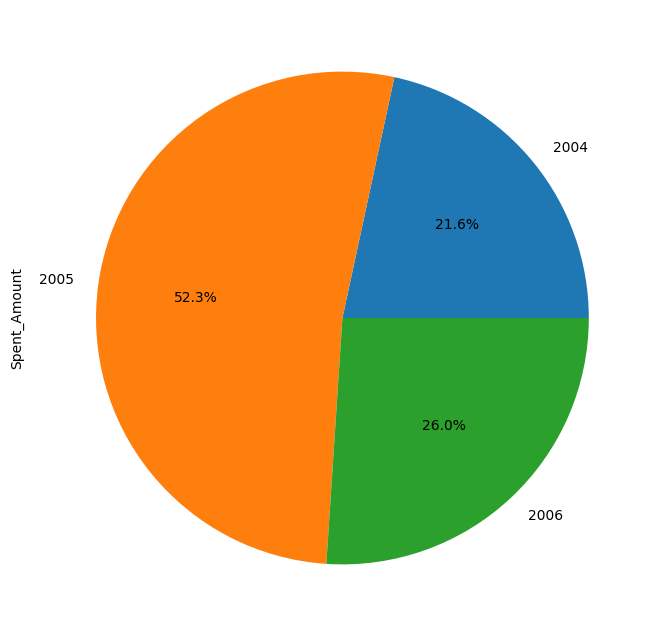

In [101]:
(air_ticket_df.groupby('year')["Spent_Amount"].sum()).plot(kind = "pie", autopct="%.1f%%",figsize = (15,8))

<AxesSubplot: xlabel='year'>

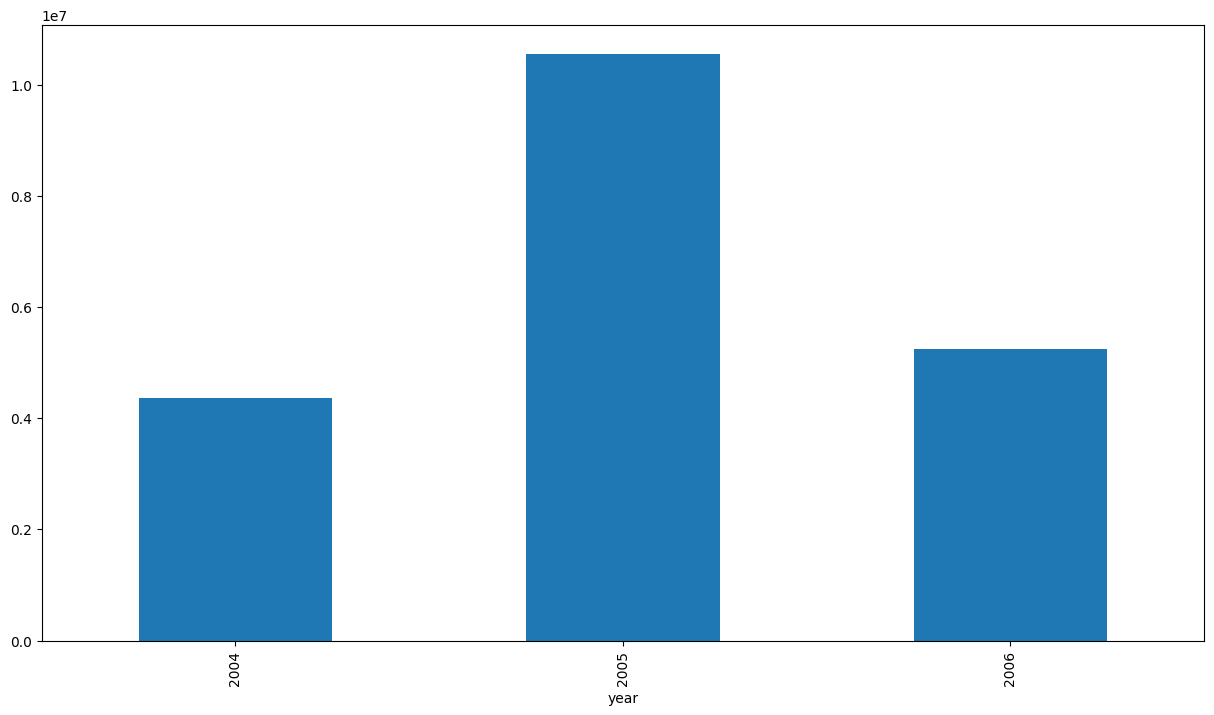

In [102]:
(air_ticket_df.groupby('year')["Spent_Amount"].sum()).plot(kind = "bar", x = "year",y="Spent_Amount",figsize = (15,8))

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [103]:
monthly_spending_on_product = pd.DataFrame(c_s_df.groupby(["year","month","Product"])["Spent_Amount"].sum()).reset_index() #

In [104]:
monthly_spending_on_product = pd.DataFrame(c_s_df.groupby(["month","Product"])["Spent_Amount"].sum()).reset_index()

In [105]:
monthly_spending_on_product = monthly_spending_on_product.pivot(index="Product",columns="month",values="Spent_Amount")

In [106]:
monthly_spending_on_product.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
Product,,,,,,,,,,,,
Gold,32413831.83,24779179.55,19256972.48,13170572.59,21548169.76,6538862.64,5167416.37,4954030.42,3816887.62,3018223.38,9203267.46,2332940.96
Platimum,14951578.51,9134054.58,7288837.68,5182493.86,8151926.49,2965712.71,1288156.26,1714762.80,1667840.84,550275.04,2741618.42,750156.19
Silver,4206383.62,2087018.37,3909405.83,1902322.65,2140940.01,689537.61,530153.72,293109.82,442803.13,100001.50,691102.63,200537.90


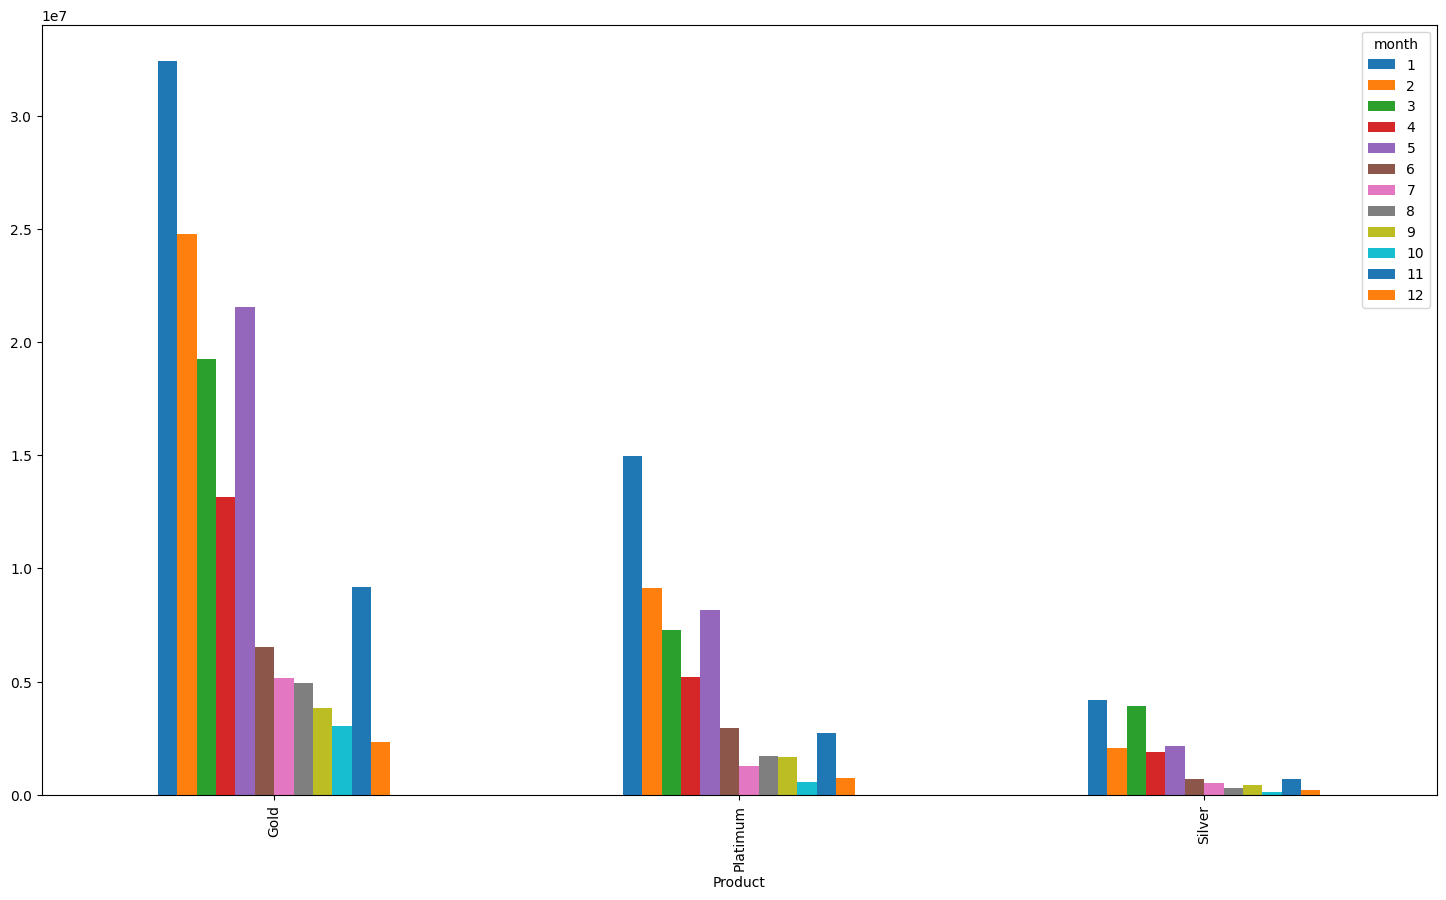

In [107]:
monthly_spending_on_product.plot(kind = 'bar',  figsize = (18,10))
plt.show()

## 5. Write user defined PYTHON function to perform the following analysis:
    You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [108]:
customer_repayment_final = c_r_df.copy()

In [109]:
customer_repayment_final.rename(columns={"month":"monthly","year":"yearly"},inplace=True)

In [110]:
customer_repayment_final.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repay_Amount,monthly,yearly
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,1,2004
1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,245899.02,1,2004
2,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,259490.06,1,2004
3,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,437555.12,1,2004
4,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,165972.88,1,2005


In [112]:
def top_ten_customer(product,time_period):
    top_customers_df = pd.DataFrame(customer_repayment_final[customer_repayment_final.Product==product].groupby(["City","Customer","Product",time_period])["Repay_Amount"].sum().reset_index().sort_values(by='Repay_Amount',ascending=False))
    top_customers_df = top_customers_df.pivot(index=['Product', 'City' , 'Customer'],columns=time_period, values='Repay_Amount')
    return top_customers_df

In [115]:
top_ten_customer('Silver','yearly')

yearly                             2004        2005        2006
Product City       Customer                                    
Silver  BANGALORE  A18        491592.71   638296.41   700000.00
                   A23        664965.71  1000010.00   872925.32
                   A59        676557.50   427247.08   600018.00
                   A72        100000.00         NaN         NaN
                   A76              NaN   265619.05         NaN
                   A77              NaN         NaN     3159.62
        BOMBAY     A22        953419.47  1141542.81   945271.83
                   A75              NaN   100003.00         NaN
                   A80              NaN         NaN   481205.64
        CALCUTTA   A2         400000.00   410274.00   200000.00
                   A58        533815.62   540173.85   411640.17
                   A73              NaN   100001.00         NaN
                   A78              NaN         NaN    55344.81
                   A87              NaN         NaN   100003.00
        CHENNAI    A85              NaN         NaN   100001.00
                   A9         380193.34   500015.00   697845.29
                   A96        100000.00         NaN         NaN
        COCHIN     A100        69551.19         NaN         NaN
                   A25        786338.08   611555.69  1000030.00
                   A7         500005.00   422177.27   608997.87
                   A74              NaN   100002.00         NaN
                   A79              NaN         NaN   193230.31
        DELHI      A24        397014.53  1184870.98   711068.52
                   A6         548574.15   427398.18   507280.51
        PATNA      A46        713614.32  1116730.89   839228.07
                   A8         800016.00   400008.00   531812.40
                   A84              NaN         NaN   100000.00
        TRIVANDRUM A57       1000010.00   200002.00   655926.99
                   A68        100000.00         NaN   100000.00
                   A86              NaN         NaN   100002.00